# Ford GoBike System Data (EDA)
## by Mohamed Sayed

## Preliminary Wrangling

This document explores a dataset of bike-sharing system covering the greater San Francisco Bay area between (2017-2020)
 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import mplleaflet
from datetime import timedelta


sb.set(style="whitegrid")
%matplotlib inline

### # Combining files 

In [2]:
import os

#list all files in current directory
files = os.listdir()

# create new list with only files that contain .csv in thier names
data = [ file for file in files if "tripdata.csv" in file] 
data

['2017-fordgobike-tripdata.csv',
 '201801-fordgobike-tripdata.csv',
 '201802-fordgobike-tripdata.csv',
 '201803-fordgobike-tripdata.csv',
 '201804-fordgobike-tripdata.csv',
 '201805-fordgobike-tripdata.csv',
 '201806-fordgobike-tripdata.csv',
 '201807-fordgobike-tripdata.csv',
 '201808-fordgobike-tripdata.csv',
 '201809-fordgobike-tripdata.csv',
 '201810-fordgobike-tripdata.csv',
 '201811-fordgobike-tripdata.csv',
 '201812-fordgobike-tripdata.csv',
 '201901-fordgobike-tripdata.csv',
 '201902-fordgobike-tripdata.csv',
 '201903-fordgobike-tripdata.csv',
 '201904-fordgobike-tripdata.csv',
 '201905-baywheels-tripdata.csv',
 '201906-baywheels-tripdata.csv',
 '201907-baywheels-tripdata.csv',
 '201908-baywheels-tripdata.csv',
 '201909-baywheels-tripdata.csv',
 '201910-baywheels-tripdata.csv',
 '201911-baywheels-tripdata.csv',
 '201912-baywheels-tripdata.csv',
 '202001-baywheels-tripdata.csv',
 '202002-baywheels-tripdata.csv',
 '202003-baywheels-tripdata.csv',
 '202004-baywheels-tripdata.csv',


before concatenation we have to make sure that csv files has the same set of headers

In [3]:
# create empty dataframe with 15 row
# actuly i decided to take a peek on number of column in each csv file 
# and i found out that number of columns between 13 and 15 (max)
Meta = pd.DataFrame([],index=range(15))
                                   

for file in data:    
    
    columns = pd.read_csv(file).columns.to_list()
    file = file.strip(".csv")
    Meta[file] = pd.Series(columns)    

C:\Users\bec_r\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\bec_r\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\bec_r\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
Meta

,2017-fordgobike-tripdata,201801-fordgobike-tripdata,201802-fordgobike-tripdata,201803-fordgobike-tripdata,201804-fordgobike-tripdata,201805-fordgobike-tripdata,201806-fordgobike-tripdata,201807-fordgobike-tripdata,201808-fordgobike-tripdata,201809-fordgobike-tripdata,...,201911-baywheels-tripdata,201912-baywheels-tripdata,202001-baywheels-tripdata,202002-baywheels-tripdata,202003-baywheels-tripdata,202004-baywheels-tripdata,202005-baywheels-tripdata,202006-baywheels-tripdata,202007-baywheels-tripdata,202008-baywheels-tripdata
0,duration_sec,duration_sec,duration_sec,duration_sec,duration_sec,duration_sec,duration_sec,duration_sec,duration_sec,duration_sec,...,duration_sec,duration_sec,duration_sec,duration_sec,duration_sec,ride_id,ride_id,ride_id,ride_id,ride_id
1,start_time,start_time,start_time,start_time,start_time,start_time,start_time,start_time,start_time,start_time,...,start_time,start_time,start_time,start_time,start_time,rideable_type,rideable_type,rideable_type,rideable_type,rideable_type
2,end_time,end_time,end_time,end_time,end_time,end_time,end_time,end_time,end_time,end_time,...,end_time,end_time,end_time,end_time,end_time,start_time,start_time,start_time,start_time,start_time
3,start_station_id,start_station_id,start_station_id,start_station_id,start_station_id,start_station_id,start_station_id,start_station_id,start_station_id,start_station_id,...,start_station_id,start_station_id,start_station_id,start_station_id,start_station_id,end_time,end_time,end_time,end_time,end_time
4,start_station_name,start_station_name,start_station_name,start_station_name,start_station_name,start_station_name,start_station_name,start_station_name,start_station_name,start_station_name,...,start_station_name,start_station_name,start_station_name,start_station_name,start_station_name,start_station_name,start_station_name,start_station_name,start_station_name,start_station_name
5,start_station_latitude,start_station_latitude,start_station_latitude,start_station_latitude,start_station_latitude,start_station_latitude,start_station_latitude,start_station_latitude,start_station_latitude,start_station_latitude,...,start_station_latitude,start_station_latitude,start_station_latitude,start_station_latitude,start_station_latitude,start_station_id,start_station_id,start_station_id,start_station_id,start_station_id
6,start_station_longitude,start_station_longitude,start_station_longitude,start_station_longitude,start_station_longitude,start_station_longitude,start_station_longitude,start_station_longitude,start_station_longitude,start_station_longitude,...,start_station_longitude,start_station_longitude,start_station_longitude,start_station_longitude,start_station_longitude,end_station_name,end_station_name,end_station_name,end_station_name,end_station_name
7,end_station_id,end_station_id,end_station_id,end_station_id,end_station_id,end_station_id,end_station_id,end_station_id,end_station_id,end_station_id,...,end_station_id,end_station_id,end_station_id,end_station_id,end_station_id,end_station_id,end_station_id,end_station_id,end_station_id,end_station_id
8,end_station_name,end_station_name,end_station_name,end_station_name,end_station_name,end_station_name,end_station_name,end_station_name,end_station_name,end_station_name,...,end_station_name,end_station_name,end_station_name,end_station_name,end_station_name,start_station_latitude,start_station_latitude,start_station_latitude,start_station_latitude,start_station_latitude
9,end_station_latitude,end_station_latitude,end_station_latitude,end_station_latitude,end_station_latitude,end_station_latitude,end_station_latitude,end_station_latitude,end_station_latitude,end_station_latitude,...,end_station_latitude,end_station_latitude,end_station_latitude,end_station_latitude,end_station_latitude,start_station_longitude,start_station_longitude,start_station_longitude,start_station_longitude,start_station_longitude


Column headers seam consistent - with few exceptions- all the way up to April 2020, starting from April 2020 columns appears to have different headers, we have to fix this issue before we go

In [ ]:
headers = {"started_at":"start_time","ended_at":"end_time","start_lat":"start_station_latitude","end_lat":"end_station_latitude",
          "start_lng":"start_station_longitude","end_lng":"end_station_longitude"
            }

for file in data[-5:]:

    new = pd.read_csv(file)
    new.rename(columns = headers,inplace = True )
    new.to_csv(file,index=False)  

In [ ]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in data ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

### # Loading dataframe 

In [2]:
usecols = ["duration_sec"
,"start_time"                 
,"end_time"                   
,"start_station_name"
,"end_station_name"           
,"start_station_latitude"
,"end_station_latitude"           
,"start_station_longitude"
,"end_station_longitude"           
,"user_type"]



Ride = pd.read_csv("combined_csv.csv",usecols = usecols )

C:\Users\bec_r\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
Ride.shape[0]

6483502

In [4]:
Ride.head()

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type
0,80110.0,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,Laguna St at Hayes St,37.776435,-122.426244,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,Customer
1,78800.0,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,Dolores St at 15th St,37.766210,-122.426614,Customer
2,45768.0,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,Downtown Berkeley BART,37.870348,-122.267764,Downtown Berkeley BART,37.870348,-122.267764,Customer
3,62172.0,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,8th St at Ringold St,37.774520,-122.409449,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,Customer
4,43603.0,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,Bancroft Way at Telegraph Ave,37.868813,-122.258764,Fulton St at Bancroft Way,37.867789,-122.265896,Subscriber


In [5]:
Ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6483502 entries, 0 to 6483501
Data columns (total 10 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             float64
 1   start_time               object 
 2   end_time                 object 
 3   start_station_name       object 
 4   start_station_latitude   float64
 5   start_station_longitude  float64
 6   end_station_name         object 
 7   end_station_latitude     float64
 8   end_station_longitude    float64
 9   user_type                object 
dtypes: float64(5), object(5)
memory usage: 494.7+ MB


In [5]:
Ride.isnull().sum()

duration_sec               688091
start_time                      0
end_time                        0
start_station_name         818300
start_station_latitude          0
start_station_longitude         0
end_station_name           831176
end_station_latitude         1038
end_station_longitude        1038
user_type                  688091
dtype: int64

Let's take a look at number of rides from each year

<r>

In [7]:
Years = Ride.start_time.apply(lambda x:x[:4]).value_counts()[['2017', '2018', '2019', '2020']]
Years

2017     519700
2018    1863721
2019    2506983
2020    1593098
Name: start_time, dtype: int64

In [75]:
Years_ = Ride_users_.start_time.apply(lambda x:x[:4]).value_counts()[['2017', '2018', '2019', '2020']]
Years_

2017     519700
2018    1863721
2019    2506983
2020     905007
Name: start_time, dtype: int64

In [86]:
duration_missing = ( Ride[Ride["duration_sec"].isnull()]
                     .start_time.apply(lambda x:x[:4])
                     .value_counts() )

duration_missing

2020    688091
Name: start_time, dtype: int64

as you might see, all duration missing records came from 2020 only 

In [80]:
user_type_missing = (Ride[Ride["user_type"].isnull()]
                     .start_time.apply(lambda x:x[:4])
                     .value_counts() )
user_type_missing

2020    688091
Name: start_time, dtype: int64

also all user_type missing records came from the same year

In [83]:
end_missing = ( Ride[Ride["end_station_name"].isnull()]
               .start_time.apply(lambda x:x[:4])
               .value_counts() )

end_missing

2020    737055
2019     82350
2018     11771
Name: start_time, dtype: int64

In [85]:
start_missing = ( Ride[Ride["start_station_name"].isnull()]
                 .start_time.apply(lambda x:x[:4])
                 .value_counts() )

start_missing

2020    726396
2019     80133
2018     11771
Name: start_time, dtype: int64

### # Remark

Before we move to the cleaning process there is one important thing to be considered 
you might have seen from previous steps that too many missing values came from only one year 2020
this issue makes it very hard to remove them from the dataset because if I do so I will cut 688091 rides from 200 making it appear to have a tremendously low number of rides compared to 2017,2018 and 2019 just because we have cut this number of rides 
while it may not be large as it seems actually

as consequence I will fill in missing values from 2020 as follows:


unknown for missing user_type  
zero for missing duration_sec






<br>

### # Users

In [6]:
Ride_users_= Ride.loc[:,["duration_sec","start_time","end_time","user_type"]]

In [7]:
Ride_users_.duration_sec.fillna(0,inplace = True)
Ride_users_.user_type.fillna("unknown",inplace = True)

In [8]:
Ride_users_ ["start_time"] = pd.to_datetime(Ride_users_ ["start_time"])
Ride_users_ ["end_time"] = pd.to_datetime(Ride_users_["end_time"])

In [9]:
Ride_users_

,duration_sec,start_time,end_time,user_type
0,80110.0,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,Customer
1,78800.0,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,Customer
2,45768.0,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,Customer
3,62172.0,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,Customer
4,43603.0,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,Subscriber
...,...,...,...,...
6483497,0.0,2020-08-09 14:06:02.000,2020-08-09 14:08:30.000,unknown
6483498,0.0,2020-08-26 16:44:56.000,2020-08-26 17:13:40.000,unknown
6483499,0.0,2020-08-31 16:13:51.000,2020-08-31 16:39:26.000,unknown
6483500,0.0,2020-08-01 15:04:57.000,2020-08-01 15:14:48.000,unknown


it will be more convenient if i converted second to HH:MM:SS

In [16]:
duration = (Ride_users_.query("duration_sec != 0")
                       .duration_sec
                       .apply(lambda x:timedelta(seconds = x)) )

duration.describe()

count                   5795411
mean     0 days 00:14:09.608998
std      0 days 00:37:13.872007
min             0 days 00:01:00
25%             0 days 00:06:00
50%             0 days 00:09:32
75%             0 days 00:14:53
max            10 days 13:21:50
Name: duration_sec, dtype: object

Most of rides take between 6 minutes to 14 minutes with minimum of one minute 

<br>

### # Location

In [4]:
Ride_location_ = Ride.loc[:,["start_station_name","end_station_name","start_station_latitude"
                                                                    ,"end_station_latitude"           
                                                                    ,"start_station_longitude"
                                                                    ,"end_station_longitude"]]
                                                                      
        

Ride_location_.dropna(subset=["start_station_latitude","end_station_latitude"           
                                                      ,"start_station_longitude"
                                                      ,"end_station_longitude"],inplace=True)

In [18]:
from math import radians, cos, sin, asin, sqrt 
def distance(lat1, lat2, lon1, lon2): 
      
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # Radius of earth in kilometers. Use 3956 for miles 
    r = 6371
       
    # calculate the result 
    return(c * r) 


# add new column for distance between start station and end station 
Ride_location_["Distance_in_Km"] = Ride_location_.apply(lambda df:distance(df["start_station_latitude"],
                                                       df["end_station_latitude"],  
                                                       df["start_station_longitude"],
                                                       df["end_station_longitude"] ),axis =1)                   


In [16]:
Ride_location_

,start_station_name,end_station_name,start_station_latitude,end_station_latitude,start_station_longitude,end_station_longitude,Distance_in_Km
0,Laguna St at Hayes St,San Francisco Public Library (Grove St at Hyde...,37.776435,37.778768,-122.426244,-122.415929,0.942931
1,Yerba Buena Center for the Arts (Howard St at ...,Dolores St at 15th St,37.784872,37.766210,-122.400876,-122.426614,3.069727
2,Downtown Berkeley BART,Downtown Berkeley BART,37.870348,37.870348,-122.267764,-122.267764,0.000000
3,8th St at Ringold St,Powell St BART Station (Market St at 5th St),37.774520,37.783899,-122.409449,-122.408445,1.046622
4,Bancroft Way at Telegraph Ave,Fulton St at Bancroft Way,37.868813,37.867789,-122.258764,-122.265896,0.636339
...,...,...,...,...,...,...,...
6483497,Fern St at Polk St,Fern St at Polk St,37.788189,37.788189,-122.420524,-122.420525,0.000044
6483498,Broderick St at Oak St,Folsom St at 5th St,37.773062,37.780645,-122.439077,-122.402866,3.292356
6483499,The Embarcadero at Sansome St,Webster St at Grove St,37.804770,37.777053,-122.403234,-122.429558,3.853531
6483500,Grand Ave at Santa Clara Ave,Grand Ave at Webster St,37.812744,37.811377,-122.247215,-122.265192,1.586568


In [296]:
Ride_location_.shape[0]

5489771

In [125]:
Ride_location_.describe()

,start_station_latitude,end_station_latitude,start_station_longitude,end_station_longitude,Distance_in_Km
count,5.489771e+06,5.489771e+06,5.489771e+06,5.489771e+06,5.489771e+06
mean,3.776976e+01,3.776924e+01,-1.223564e+02,-1.223533e+02,1.915345e+00
std,9.936122e-02,1.879190e-01,1.369869e-01,5.518443e-01,5.582750e+01
min,0.000000e+00,0.000000e+00,-1.225091e+02,-1.225101e+02,0.000000e+00
25%,3.777041e+01,3.777106e+01,-1.224133e+02,-1.224117e+02,8.957930e-01
50%,3.778095e+01,3.778107e+01,-1.223985e+02,-1.223983e+02,1.414005e+00
75%,3.779539e+01,3.779625e+01,-1.223768e+02,-1.223768e+02,2.182751e+00
max,4.551000e+01,4.551000e+01,0.000000e+00,0.000000e+00,1.279973e+04


In [17]:
Ride_location_[Ride_location_["Distance_in_Km"]>=2.182751]

,start_station_name,end_station_name,start_station_latitude,end_station_latitude,start_station_longitude,end_station_longitude,Distance_in_Km
1,Yerba Buena Center for the Arts (Howard St at ...,Dolores St at 15th St,37.784872,37.766210,-122.400876,-122.426614,3.069727
17,Folsom St at 9th St,San Francisco Ferry Building (Harry Bridges Pl...,37.773717,37.795392,-122.411647,-122.394203,2.856333
18,Folsom St at 9th St,San Francisco Ferry Building (Harry Bridges Pl...,37.773717,37.795392,-122.411647,-122.394203,2.856333
19,Cyril Magnin St at Ellis St,Folsom St at 19th St,37.785881,37.760594,-122.408915,-122.414817,2.859242
21,San Francisco Caltrain (Townsend St at 4th St),The Embarcadero at Sansome St,37.776598,37.804770,-122.395282,-122.403234,3.209571
...,...,...,...,...,...,...,...
6483484,NaN,NaN,37.760000,37.780000,-122.430000,-122.440000,2.391299
6483496,Stanyan St at Geary Blvd,Funston Ave at Irving St,37.780949,37.763934,-122.456303,-122.470651,2.273740
6483498,Broderick St at Oak St,Folsom St at 5th St,37.773062,37.780645,-122.439077,-122.402866,3.292356
6483499,The Embarcadero at Sansome St,Webster St at Grove St,37.804770,37.777053,-122.403234,-122.429558,3.853531


In [18]:
Ride_location_[Ride_location_["Distance_in_Km"]==0]

,start_station_name,end_station_name,start_station_latitude,end_station_latitude,start_station_longitude,end_station_longitude,Distance_in_Km
2,Downtown Berkeley BART,Downtown Berkeley BART,37.870348,37.870348,-122.267764,-122.267764,0.0
5,San Francisco Caltrain (Townsend St at 4th St),San Francisco Caltrain (Townsend St at 4th St),37.776598,37.776598,-122.395282,-122.395282,0.0
6,Addison St at Fourth St,Addison St at Fourth St,37.866249,37.866249,-122.299371,-122.299371,0.0
7,Yerba Buena Center for the Arts (Howard St at ...,Yerba Buena Center for the Arts (Howard St at ...,37.784872,37.784872,-122.400876,-122.400876,0.0
8,Mechanics Monument Plaza (Market St at Bush St),Mechanics Monument Plaza (Market St at Bush St),37.791300,37.791300,-122.399051,-122.399051,0.0
...,...,...,...,...,...,...,...
6483379,Berry St at 4th St,Berry St at 4th St,37.775880,37.775880,-122.393170,-122.393170,0.0
6483385,Berry St at 4th St,Berry St at 4th St,37.775880,37.775880,-122.393170,-122.393170,0.0
6483421,NaN,NaN,37.810000,37.810000,-122.450000,-122.450000,0.0
6483441,48th Ave at Cabrillo St,48th Ave at Cabrillo St,37.772954,37.772954,-122.509071,-122.509071,0.0


197639  ride started and ended in the same station 

In [5]:
plt.figure(figsize=(8,8))
lons_start= Ride_location_['start_station_longitude'].tolist()[:500]
lats_start = Ride_location_['start_station_latitude'].tolist()[:500]
lons_end = Ride_location_['end_station_longitude'].tolist()[:500]
lats_end = Ride_location_['end_station_latitude'].tolist()[:500]
plt.scatter(lons_start,lats_start,c='r', alpha=0.7, s=100);
plt.scatter(lons_end,lats_end,c='b', alpha=0.7, s=100);

mplleaflet.display()

C:\Users\bec_r\anaconda3\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### What is the structure of your dataset?

<blockquote>
6483501 individual ride made in a bike-sharing system covering the greater San Francisco Bay area
for perpous of making data more tidy and well structured, original dataframe is splited into 2 dataframe (Ride_location,Ride_users), Ride_loacation stores ride info while Ride_users stores (ride duration , start/end time and user type) 
    
</blockquote>

<blockquote>
   
for Ride_location dataframe all variables are numerical except forstart_station_name and end_station_name
while for Ride_users dataframe user_type variable is catagorical nominal     

</blockquote>


### What is/are the main feature(s) of interest in your dataset?

>I'm interested in features that describe the behavior of customer and subscribers e.g: ride start time, duration, and distance 
 such features can be very useful and tell a lot about how much GoBike service is affected by Covid 19 pandemic

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start_time, duration, and user_type contain valuable information as I expect, also latiude and lontidude will be helpful to calulate distance between start and end station 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [10]:
Ride_users_.set_index("start_time",inplace = True)

 for quick overview lets take alook on how many rides GoBike service make each year
 and we will dig deep as we move on 

In [11]:
Groupby_years = Ride_users_.resample("Y").user_type.count()

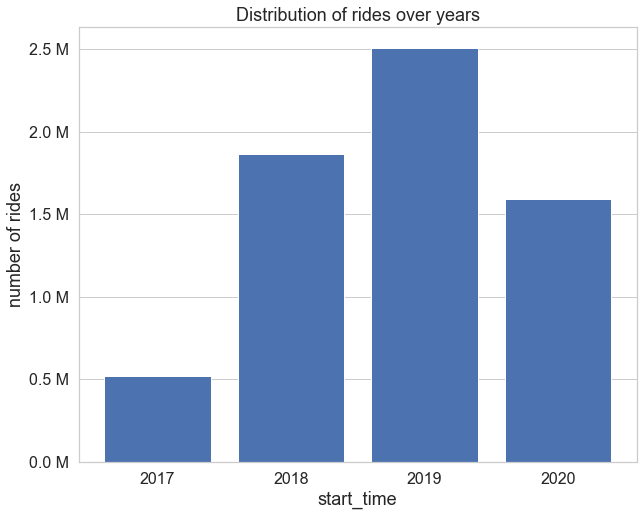

In [21]:
fig,ax = plt.subplots(figsize=(10,8))

ax.bar( ["2017","2018","2019","2020"] , Groupby_years.values.tolist() )
ax.set_title("Distribution of rides over years",fontsize = 18);
ax.set_xlabel("start_time",fontsize = 18)
ax.set_ylabel("number of rides",fontsize = 18)
ax.tick_params(which="both",labelsize = 16)
ax.grid(axis="x")


# change y axis tick labels
new_labels = [ ]

locs, labels = plt.yticks()

for loc in locs:
    
  new_labels.append("{:} M".format(loc/1000000))

ax.set_yticklabels(new_labels);

 Number of rides starts increasing in 2018 which means GoBike service grow until it reaches its max in 2019 but it starts to decrease again in 2020 it lost approximately 1 million users, this sudden drop in the number of rides happened in 2020 need more attention 

To get a more detailed picture of what happened to GoBike during 2020 building a plot of the distribution of rides over year quarters


In [ ]:
Groupby_quarter = ( Ride_users_.resample("Q")
                               .user_type.count() 
                               .rename( index=lambda x: str(x.to_period('Q')).lower()) ) 

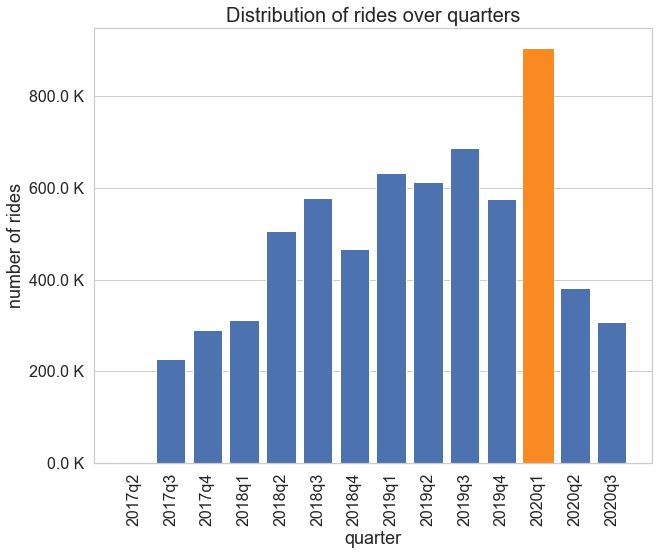

In [113]:
fig,ax = plt.subplots(figsize=(10,8))

Bars = ax.bar(Groupby_quarter.index.tolist(), Groupby_quarter.values.tolist() )
ax.set_title("Distribution of rides over years quarters",fontsize = 20);
ax.set_xlabel("quarter",fontsize = 18)
ax.set_ylabel("number of rides",fontsize = 18)
ax.tick_params(which="both",labelsize = 16)
ax.grid(axis="x")

# rotate x axis tick labels
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
# change y axis tick labels    
new_labels = [ ]

locs, labels = plt.yticks()


for loc in locs:
    
  new_labels.append("{:} K".format(loc/1000))

ax.set_yticklabels(new_labels); 
Bars[11].set_color('#f88a21')


The number of rides increased greatly during the first quarter of 2020 but it dropped from 800 K ride to approximately 400 k in the second quarter of the same year shocking isn't it?

This sudden decrease correlated with Covid 19 pandemic that's when entire cites were locked down

In [78]:
Monthof_year = ( Ride_users_.rename(index = lambda x : x.strftime("%b") )
                            .groupby(level = 0)
                            .user_type.count() )

In [81]:
ordered = Monthof_year[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]]

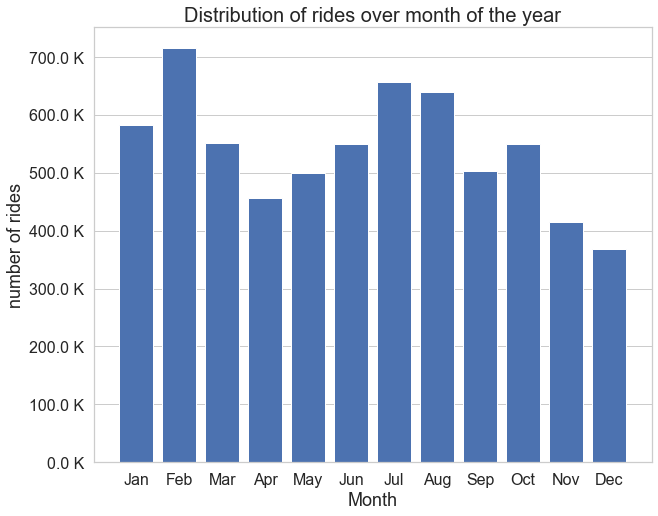

In [82]:
fig,ax = plt.subplots(figsize=(10,8))

ax.bar(ordered.index.tolist(),ordered.values.tolist())
ax.set_title("Distribution of rides over month of the year",fontsize = 20);
ax.set_xlabel("Month",fontsize = 18)
ax.set_ylabel("number of rides",fontsize = 18)
ax.tick_params(which="both",labelsize = 16)
ax.grid(axis="x")

# change y axis tick labels
new_labels = [ ]

locs, labels = plt.yticks()

for loc in locs:
    
  new_labels.append("{:} K".format(loc/1000))


ax.set_yticklabels(new_labels);

In [114]:
Dayof_week = ( Ride_users_.rename(index = lambda x : x.strftime("%a") )
                          .groupby(level = 0)
                          .user_type.count() )

In [115]:
ordered = Dayof_week[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]

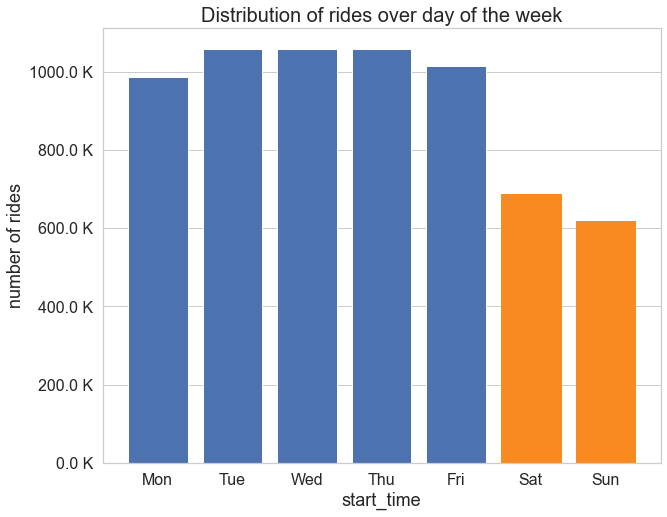

In [116]:
fig,ax = plt.subplots(figsize=(10,8))

Bars = ax.bar(ordered.index.tolist(),ordered.values.tolist())
ax.set_title("Distribution of rides over days of the week",fontsize = 20);
ax.set_xlabel("start_time",fontsize = 18)
ax.set_ylabel("number of rides",fontsize = 18)
ax.tick_params(which="both",labelsize = 16)
ax.grid(axis="x")

# change y axis tick labels
new_labels = [ ]

locs, labels = plt.yticks()

for loc in locs:
    
  new_labels.append("{:} K".format(loc/1000))


ax.set_yticklabels(new_labels);

# change weekend bar color
Bars[6].set_color('#f88a21')
Bars[5].set_color('#f88a21')

Demand on GoBike service decrease on weekend which means that most of users use GoBike to reach their work 

In [17]:
Groupby_hour = (Ride_users_.rename(index = lambda x : x.replace(year=2017,month =1,day = 1))
                           .resample("H")
                           .user_type.count() )

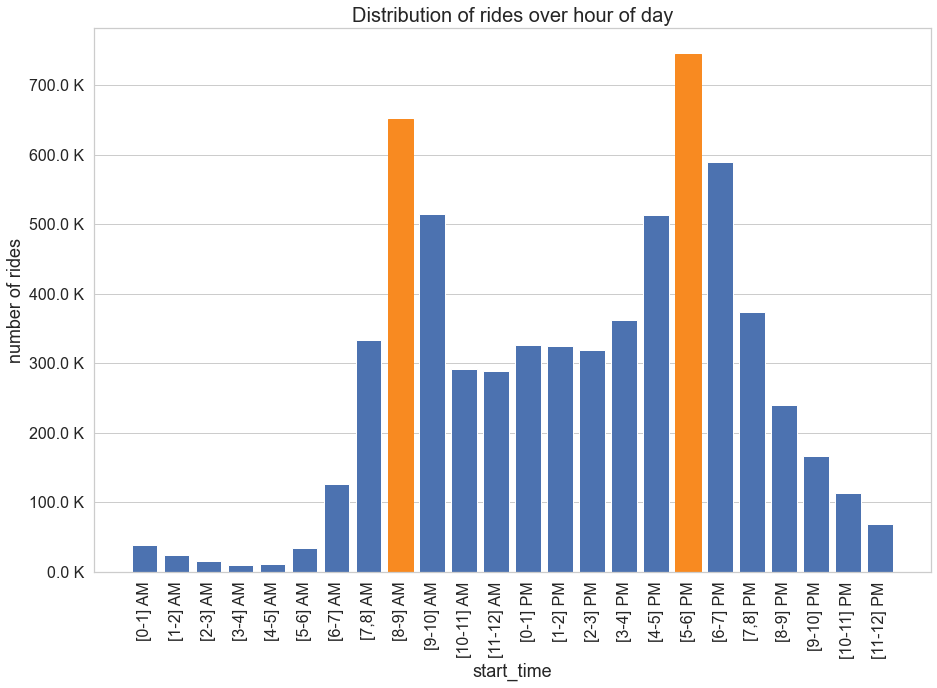

In [272]:
fig,ax = plt.subplots(figsize=(15,10))

labels = ["[0-1] AM","[1-2] AM","[2-3] AM","[3-4] AM","[4-5] AM","[5-6] AM","[6-7] AM","[7,8] AM","[8-9] AM","[9-10] AM","[10-11] AM","[11-12] AM"
          ,"[0-1] PM","[1-2] PM","[2-3] PM","[3-4] PM","[4-5] PM","[5-6] PM","[6-7] PM","[7,8] PM","[8-9] PM","[9-10] PM","[10-11] PM","[11-12] PM"]


Bars = ax.bar(labels,Groupby_hour.values.tolist() )
ax.set_title("Distribution of rides over hours of the day",fontsize = 20);
ax.set_xlabel("start_time",fontsize = 18)
ax.set_ylabel("number of rides",fontsize = 18)
ax.tick_params(which="both",labelsize = 16)
ax.grid(axis="x")

# rotate x axis tick labels
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
    
# change y axis tick labels
new_labels = [ ]

locs, labels = plt.yticks()

for loc in locs:
    
  new_labels.append("{:} K".format(loc/1000))


ax.set_yticklabels(new_labels);   


# change bars with the highest number of rides 
Bars[8].set_color('#f88a21')
Bars[17].set_color('#f88a21')

In [16]:
# removing rides with zero distance 
data = Ride_location_.query("Distance_in_Km != 0 ")

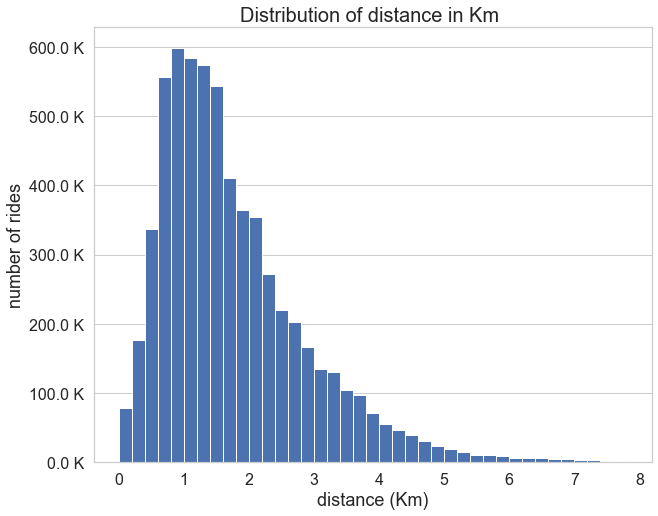

In [17]:
fig,ax = plt.subplots(figsize=(10,8))

bins = np.arange(0,8,.2)
ax.hist( data.Distance_in_Km,bins = bins );
ax.set_title("Distribution of distance",fontsize = 20);
ax.set_xlabel("distance (Km)",fontsize = 18)
ax.set_ylabel("number of rides",fontsize = 18)
ax.tick_params(which="both",labelsize = 16)
ax.grid(axis="x")

# change y axis tick labels
new_labels = [ ]

locs, labels = plt.yticks()

for loc in locs:
    
  new_labels.append("{:} K".format(loc/1000))


ax.set_yticklabels(new_labels);  

Distribution of distance is right skewed which means that most users use GoBike sevices for short ride
almost between less than 1 km to 2 km 


In [13]:
data = Ride_users_.query("duration_sec != 0")

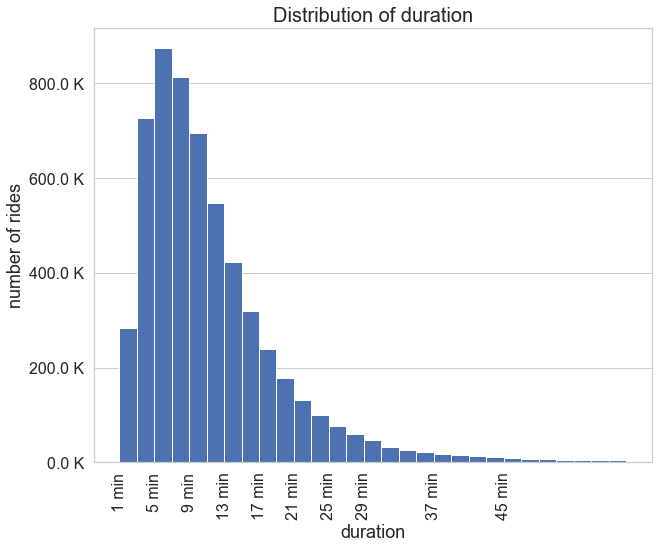

In [16]:
fig,ax = plt.subplots(figsize=(10,8))

bins = np.arange(60,60*60,120)

ax.hist(data.duration_sec,bins = bins);
ax.set_xticks([60,5*60,9*60,13*60,17*60,21*60,25*60,29*60,37*60,45*60])
ax.set_xticklabels(["1 min","5 min","9 min","13 min","17 min","21 min","25 min","29 min","37 min","45 min"])

ax.set_xlabel("duration",fontsize = 18)
ax.set_ylabel("number of rides",fontsize = 18)
ax.set_title("Distribution of duration",fontsize = 20)
ax.tick_params(which="both",labelsize = 16)
ax.grid(axis="x")


# rotate x axis tick labels
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

    
# change y axis tick labels
new_labels = [ ]

locs, labels = plt.yticks()

for loc in locs:
    
  new_labels.append("{:} K".format(loc/1000))


ax.set_yticklabels(new_labels);      

Duration distribution is right-skewed confirm the results acquired from above, which mean that most users use GoBike services for the short ride almost between 6 to 14 minute 

In [23]:
data = Ride_users_.query("user_type != 'unknown'")

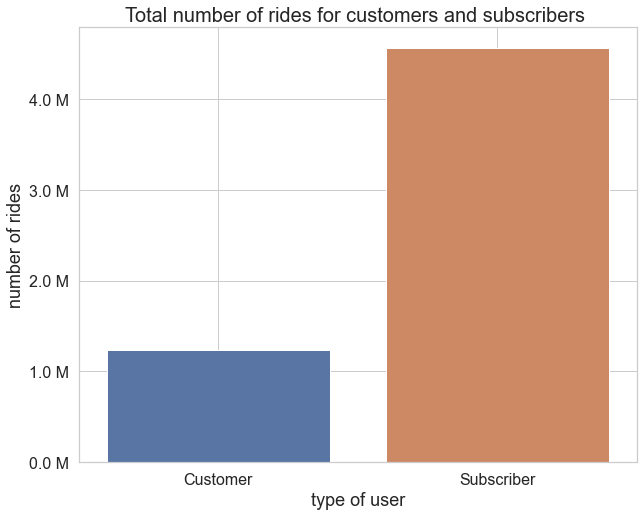

In [24]:
plt.figure(figsize=(10,8))


ax = sb.countplot(data = data , x ="user_type");

ax.set_title("Total number of rides for customers and subscribers ",fontsize = 20);
ax.set_xlabel("type of user",fontsize = 18)
ax.set_ylabel("number of rides",fontsize = 18)
ax.tick_params(which="both",labelsize = 16)
ax.grid(axis="x")


# change y axis tick labels
new_labels = [ ]

locs, labels = plt.yticks()

for loc in locs:
    
  new_labels.append("{:} M".format(loc/1000000))


ax.set_yticklabels(new_labels);   

Number of subscribers is almost 4 or 5 times number of customer

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


<blockquote>
    
Detailed over view show 3 main insights

- The GoBike sharing business is highly affected By Covid 19 pandemic, it lost around 600k ride 
  on the 2nd and 3rd quarter of 2020 
    
- Most of users are subscribers (more than 4 million subscriber)

- Most users use GoBike services for the short ride almost between 6 to 14 minute
    
- Demand on Bike sharing reaches its highest value between 8 to 9 AM and 5 to 6 PM

   
    
</blockquote>


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

<blockquote>

Alot of changes done on dataset to make it well structured  

- Original dataframe is splited into 2 dataframe Ride_location_ and Ride_users_  
- For Ride_users start_time and end_time colums values are converted to datetime like object 
- For Ride_location one additional column is created to store the distace in km 
- Missing values on Ride_users are filled with unknown for missing user_type zero for missing duration_sec
    
</blockquote>
    

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [12]:
data = Ride_users_.query("user_type != 'unknown'")

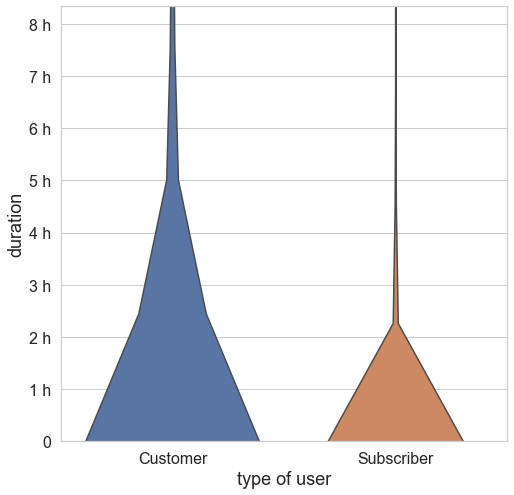

In [58]:
plt.figure(figsize =(8,8) )

ax = sb.violinplot(data=data , x ="user_type", y ="duration_sec",inner=None);

ax.set_yticks(np.arange(0,9*3600,3600))
ax.set_yticklabels(["0","1 h","2 h","3 h","4 h","5 h","6 h","7 h","8 h"])

ax.set_xlabel("type of user",fontsize = 18)
ax.set_ylabel("duration",fontsize = 18)
ax.tick_params(which="both",labelsize = 16)
ax.set_ylim(0,30000)
ax.grid(axis="x")

Customers ride duration has lage spreading over wide range of time while subscriber compared to subscribers

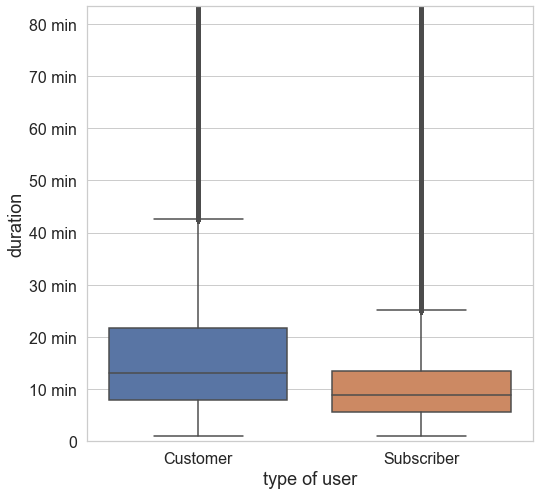

In [18]:
plt.figure(figsize =(8,8) )

ax = sb.boxplot(data=data , x ="user_type", y ="duration_sec" );
ax.set_yticks(np.arange(0,5400,600))
ax.set_yticklabels(["0","10 min","20 min","30 min","40 min","50 min","60 min","70 min","80 min"])

ax.set_xlabel("type of user",fontsize = 18)
ax.set_ylabel("duration",fontsize = 18)
ax.tick_params(which="both",labelsize = 16)
ax.set_ylim(0,5000);

Rides with a duration greater than 45 min for customers and  25 min for subscribers considered as an outlier 


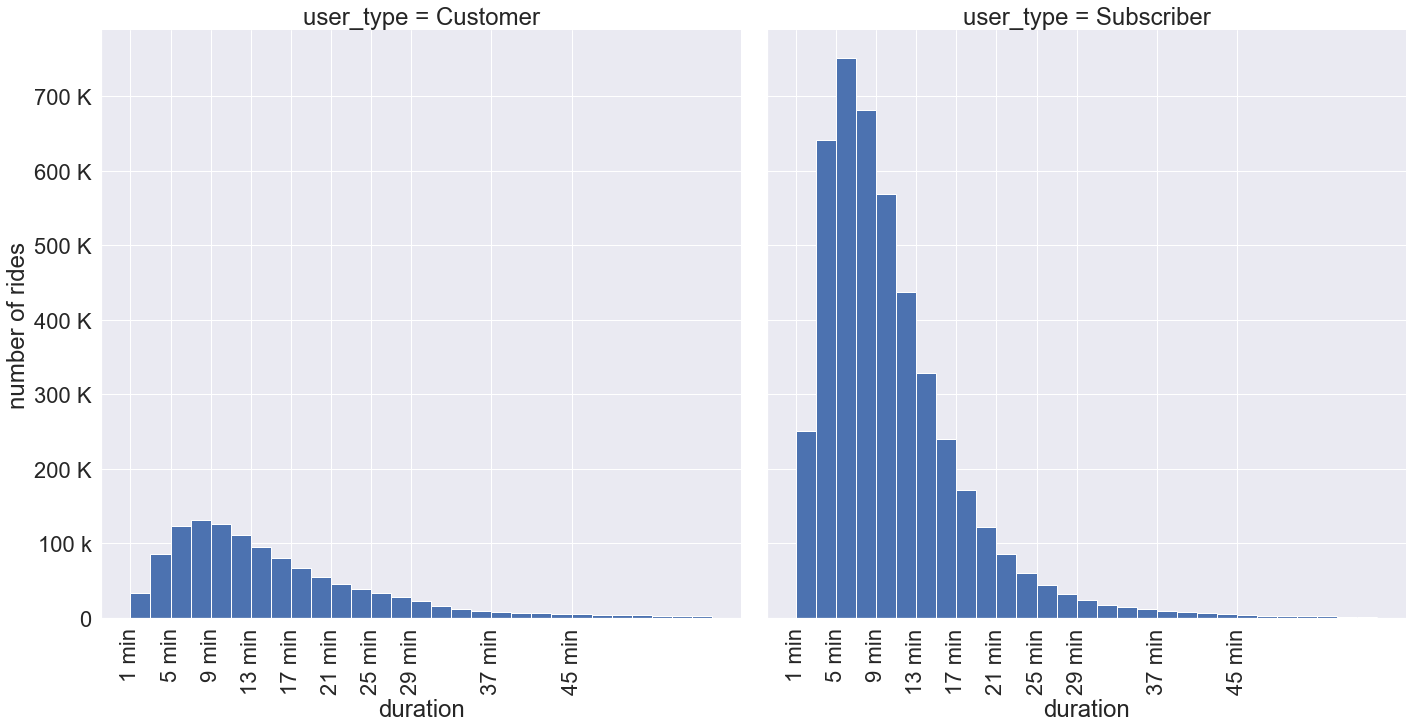

In [20]:
sb.set(font_scale=2)


bins = np.arange(60,60*60,120)

g = sb.FacetGrid(data = data, col = 'user_type',height=10)
g.map(plt.hist, "duration_sec",bins =bins)
g.set_axis_labels("duration")
g.set_ylabels("number of rides")
g.set(xticks=[60,5*60,9*60,13*60,17*60,21*60,25*60,29*60,37*60,45*60])
g.set_xticklabels(["1 min","5 min","9 min","13 min","17 min","21 min","25 min","29 min","37 min","45 min"],rotation=90)
g.set_yticklabels(["0","100 k","200 K","300 K","400 K","500 K","600 K","700 K"])

In [44]:
customers = ( Ride_users_.query("user_type == 'Customer'")
                              .resample("Q")
                              .user_type.count() 
                              .rename( index=lambda x: str(x.to_period('Q')).lower()) ) 


subscribers = ( Ride_users_.query("user_type == 'Subscriber'")
                           .resample("Q")
                           .user_type.count() 
                           .rename( index=lambda x: str(x.to_period('Q')).lower()) ) 

In [45]:
sb.set(style="whitegrid")

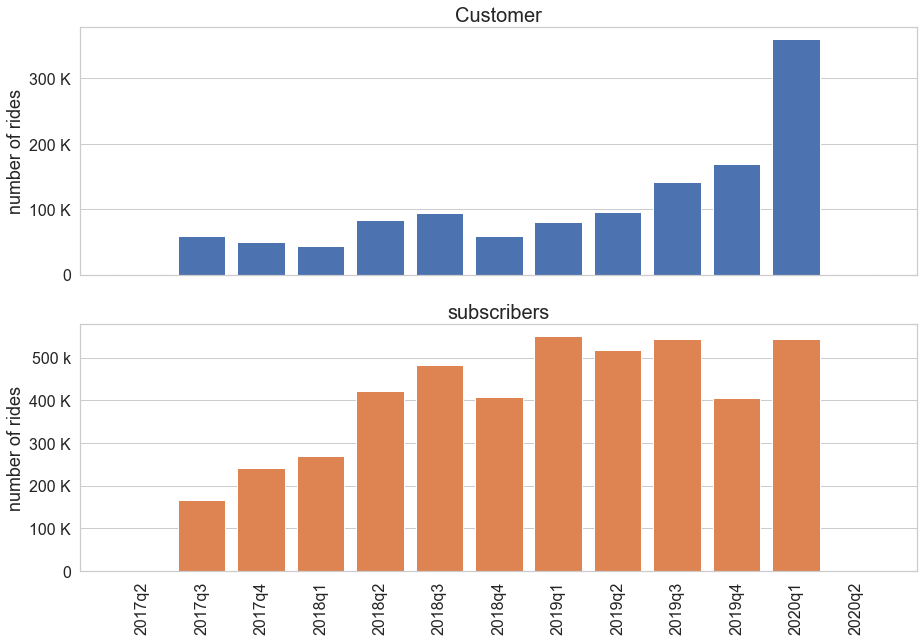

In [41]:
plt.figure(figsize =(15,10))

ax1 = plt.subplot(211)

Bars = ax1.bar(customers.index.tolist(), customers.values.tolist() )
ax1.set_yticks([0,100000,200000,300000])
ax1.set_yticklabels(["0","100 K","200 K","300 K"]);


ax1.set_title("Customer",fontsize = 20)
ax1.set_ylabel("number of rides",fontsize = 18)
ax1.tick_params(which="both",labelsize = 16,labelbottom =False)
ax1.grid(axis="x")


ax2 = plt.subplot(212)

Bars = ax2.bar(subscribers.index.tolist(),subscribers.tolist(),color = '#dd8452' )
ax2.set_yticks([0,100000,200000,300000,400000,500000])
ax2.set_yticklabels(["0","100 K","200 K","300 K","400 K","500 k"]);

ax2.set_title("subscribers",fontsize = 20);
ax2.set_ylabel("number of rides",fontsize = 18)
ax2.tick_params(which="both",labelsize = 16)
ax2.grid(axis="x")

# rotate x axis tick labels
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

For customers number of rides increased slightly until the end of the fourth quarter of 2019, with the beginning of 2020, where the number of rides increased tremendously

for subscribers number of rides increased gradually (but with a higher rate compared to customers) until the first quarter of 2019, number of rides stays almost constant over 2019 during the fourth quarter number of rides decreased and with the beginning of 2020 they recovered again 

In [35]:
customers = ( Ride_users_.query("user_type == 'Customer'")
                         .rename(index = lambda x : x.strftime("%a") )
                         .groupby(level = 0)
                         .user_type.count() )

subscribers = ( Ride_users_.query("user_type == 'Subscriber'")
                           .rename(index = lambda x : x.strftime("%a") )
                           .groupby(level = 0)
                           .user_type.count()   )  

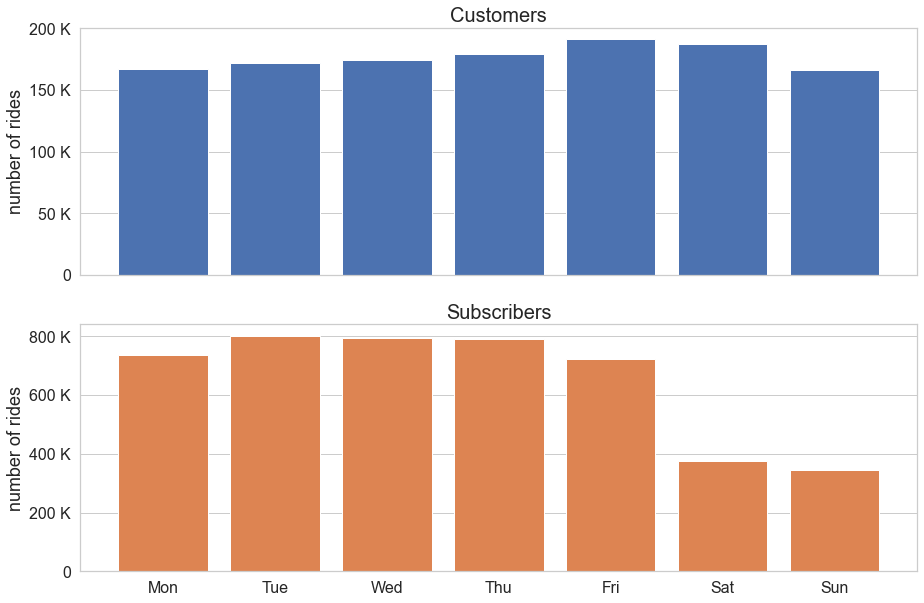

In [36]:
plt.figure(figsize =(15,10))

ax1 = plt.subplot(211)


ordered = customers[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]
ax1.bar(ordered.index.tolist(),ordered.values.tolist() )
ax1.set_yticks([0,50000,100000,150000,200000])
ax1.set_yticklabels(["0","50 K","100 K","150 K","200 K"]);

ax1.set_title("Customers",fontsize = 20);
ax1.set_ylabel("number of rides",fontsize = 18)
ax1.tick_params(which="both",labelsize = 16,labelbottom = False)
ax1.grid(axis="x")



ax2 = plt.subplot(212)


ordered = subscribers[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]
ax2.bar(ordered.index.tolist(),ordered.tolist(),color = '#dd8452')

ax2.set_title("Subscribers",fontsize = 20);
ax2.set_ylabel("number of rides",fontsize = 18)
ax2.tick_params(which="both",labelsize = 16)
ax2.grid(axis="x")                  
ax2.set_yticks([0,200000,400000,600000,800000])
ax2.set_yticklabels(["0","200 K","400 K","600 K","800 K"]);


Zooming into customers distribution to get more details

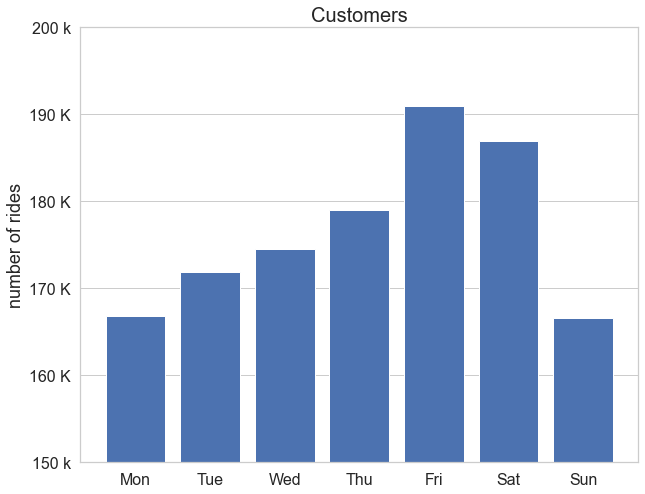

In [37]:
fig,ax = plt.subplots(figsize=(10,8))

ordered = customers[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]

ax.bar(ordered.index.tolist(),ordered.values.tolist())
ax.set_yticks([150000,160000,170000,180000,190000,200000])
ax.set_yticklabels(["150 k","160 K","170 K","180 K","190 K","200 k"]);
ax.set_ylim(150000,200000)

ax.set_title("Customers",fontsize = 20);
ax.set_ylabel("number of rides",fontsize = 18)
ax.tick_params(which="both",labelsize = 16)
ax.grid(axis="x")


Customers number of rides is almost the same across all days of the week with a slight increase in the number of rides around 20 k on Friday. on contrary, number of rides suddenly drops on weekends for subscribers which confirms that subscribers use GoBike to reach their workplace 


In [12]:
customers = ( Ride_users_.query("user_type == 'Customer'")
                         .rename(index = lambda x : x.replace(year=2017,month =1,day = 1) ) 
                         .resample("H")
                         .user_type.count()   ) 

subscribers = ( Ride_users_.query("user_type == 'Subscriber'")
                           .rename(index = lambda x : x.replace(year=2017,month =1,day = 1) ) 
                           .resample("H")
                           .user_type.count()   )  

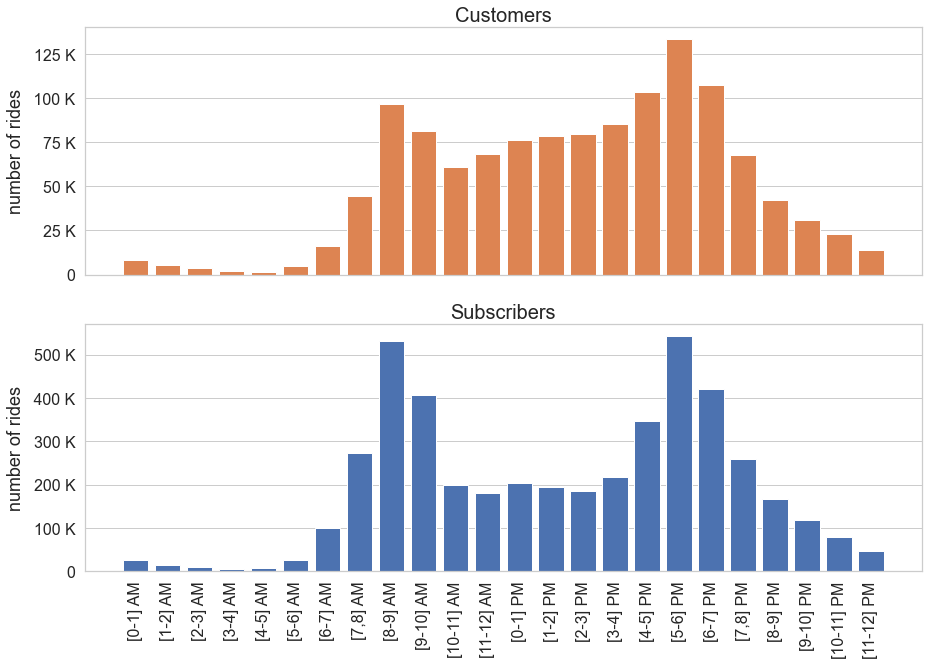

In [112]:
plt.figure(figsize =(15,10))



ax1 = plt.subplot(211)


labels = ["[0-1] AM","[1-2] AM","[2-3] AM","[3-4] AM","[4-5] AM","[5-6] AM","[6-7] AM","[7,8] AM","[8-9] AM","[9-10] AM","[10-11] AM","[11-12] AM"
          ,"[0-1] PM","[1-2] PM","[2-3] PM","[3-4] PM","[4-5] PM","[5-6] PM","[6-7] PM","[7,8] PM","[8-9] PM","[9-10] PM","[10-11] PM","[11-12] PM"]



ax1.bar(labels,customers.values.tolist() )


ax1.set_title("Customers",fontsize = 20);
ax1.set_ylabel("number of rides",fontsize = 18)
ax1.tick_params(which="both",labelsize = 16,labelbottom = False)
ax1.grid(axis="x")
ax1.set_yticks([0,25000,50000,75000,100000,125000])
ax1.set_yticklabels(["0","25 K","50 K","75 K"," 100 K","125 K"]);


ax2 = plt.subplot(212)

ax2.bar(labels,subscribers.values.tolist(),color = '#dd8452')

ax2.set_title("Subscribers",fontsize = 20);
ax2.set_ylabel("number of rides",fontsize = 18)
ax2.tick_params(which="both",labelsize = 16)
ax2.grid(axis="x")                  


# rotate x axis tick labels
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
    
 

ax2.set_yticks([0,100000,200000,300000,400000,500000])
ax2.set_yticklabels(["0","100 K","200 K","300 K"," 400 K","500 K"]);      

This plot says a lot about customers and subscribers behavior, subscribers distribution appears to be bimodal with a plateau region between 10 to 4 PM  forming a gap between two periods of high demand where the number of rides still constant for about 6 hours

Customers distribution is approximately left-skewed, and the number of rides starts increasing in the early morning and continue to increase and reaches its high value between 5 and 6 then it starts decreasing


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

<blockquote>
    
- Relation between the type of user and duration shows that most of customers rides take about 8 min to 22 min while 
  most subscribers rides take about 7 to 12  min 
    
    

- Relation between start time and user type shows the difference in behavior between customers and subscribers
  for subscribers, plot shows a high demand for GoBike service on two periods of the day between 8 to 9 AM and 5-6 PM 
  for customers, plot shows an increasing demand for GoBike service starts at 7 AM until 6 PM when the demand starts decreasing   
  
    
    
</blockquote>    



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration
> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [42]:
customers = ( Ride_users_.query("user_type == 'Customer'")
                             .rename(index = lambda x : x.replace(year=2017,month =1,day = 1) ) 
                             .resample("H")
                             .duration_sec.mean()   ) 

subscribers = ( Ride_users_.query("user_type == 'Subscriber'")
                               .rename(index = lambda x : x.replace(year=2017,month =1,day = 1) ) 
                               .resample("H")
                               .duration_sec.mean()   )  

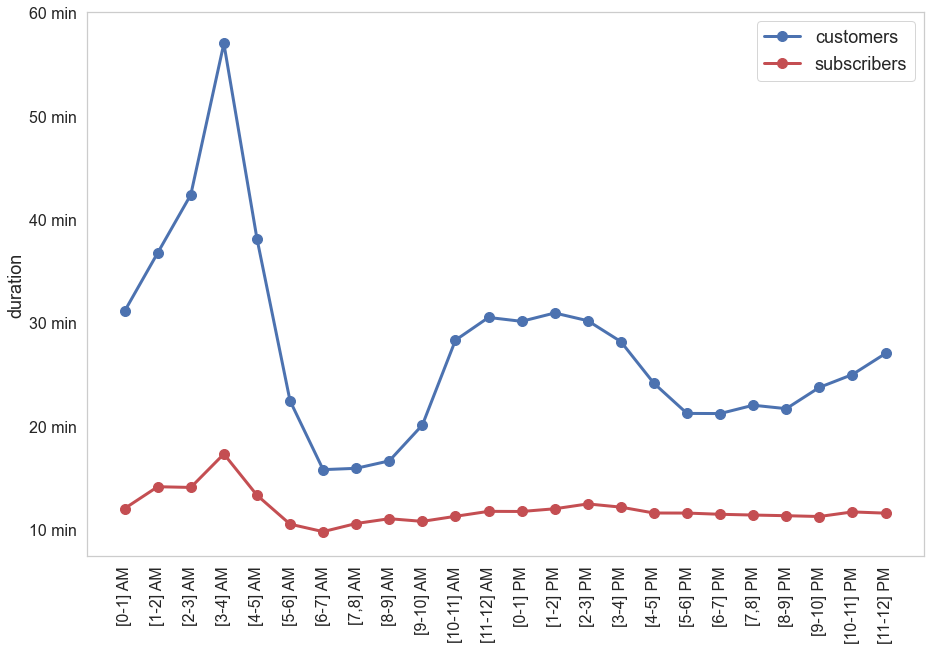

In [43]:
fig,ax = plt.subplots(figsize=(15,10))

labels = ["[0-1] AM","[1-2] AM","[2-3] AM","[3-4] AM","[4-5] AM","[5-6] AM","[6-7] AM","[7,8] AM","[8-9] AM","[9-10] AM","[10-11] AM","[11-12] AM"
          ,"[0-1] PM","[1-2] PM","[2-3] PM","[3-4] PM","[4-5] PM","[5-6] PM","[6-7] PM","[7,8] PM","[8-9] PM","[9-10] PM","[10-11] PM","[11-12] PM"]

ax.plot(labels,customers.values.tolist(),color='b', marker='o',linewidth=3 ,markersize=10,label="customers")
ax.plot(labels,subscribers.values.tolist(),color='r', marker='o',linewidth=3 ,markersize=10,label="subscribers")


ax.set_yticks(np.arange(600,4200,600))
ax.set_yticklabels(["10 min","20 min","30 min","40 min","50 min","60 min"])

ax.set_ylabel("duration",fontsize = 18)
ax.tick_params(which="both",labelsize = 16)
ax.grid([])


# rotate x axis tick labels
for tick in ax.get_xticklabels():
    tick.set_rotation(90)  
    
ax.legend(fontsize=18);

Plot shows that customers spend on average large time compared subscribers over the entire day

In [31]:
Combined = ( Ride_users_.reset_index()
                        .merge(Ride_location_, left_index=True, right_index=True)
                        .set_index("start_time")    )

In [65]:
customers = ( Combined.query("user_type == 'Customer' and Distance_in_Km !=0")).copy()
subscribers = ( Combined.query("user_type == 'Subscriber'and Distance_in_Km !=0")).copy()

In [66]:
customers.duration_sec.describe()

count    1.160442e+06
mean     1.337104e+03
std      3.774726e+03
min      6.000000e+01
25%      4.760000e+02
50%      7.670000e+02
75%      1.234000e+03
max      9.121100e+05
Name: duration_sec, dtype: float64

In [67]:
subscribers.duration_sec.describe()

count    4.488031e+06
mean     6.718739e+02
std      1.281620e+03
min      6.000000e+01
25%      3.400000e+02
50%      5.300000e+02
75%      8.030000e+02
max      8.110770e+05
Name: duration_sec, dtype: float64

In [68]:
ind = customers.query("duration_sec > 100000").index
customers.drop(ind,inplace = True)

DatetimeIndex(['2019-12-19 23:15:36'], dtype='datetime64[ns]', name='start_time', freq=None)

In [70]:
ind = subscribers.query("duration_sec > 100000").index
subscribers.drop(ind,inplace = True)

DatetimeIndex(['2020-01-09 16:23:21'], dtype='datetime64[ns]', name='start_time', freq=None)

In [110]:
(customers.query("duration_sec != 0")
          .duration_sec
          .apply(lambda x:timedelta(seconds = x)) ).describe()

count                   1160441
mean     0 days 00:22:16.318871
std      0 days 01:01:18.823621
min             0 days 00:01:00
25%             0 days 00:07:56
50%             0 days 00:12:47
75%             0 days 00:20:34
max             0 days 23:59:15
Name: duration_sec, dtype: object

In [90]:
customers.Distance_in_Km.describe()

count    1.160441e+06
mean     2.593709e+00
std      9.720606e+01
min      8.841746e-05
25%      1.039332e+00
50%      1.590463e+00
75%      2.412744e+00
max      1.279973e+04
Name: Distance_in_Km, dtype: float64

In [108]:
(subscribers.query("duration_sec != 0")
            .duration_sec
            .apply(lambda x:timedelta(seconds = x)) ).describe()

count                   4488030
mean     0 days 00:11:11.693329
std      0 days 00:20:23.199010
min             0 days 00:01:00
25%             0 days 00:05:40
50%             0 days 00:08:50
75%             0 days 00:13:23
max             0 days 23:58:01
Name: duration_sec, dtype: object

In [109]:
subscribers.Distance_in_Km.describe()

count    4.488030e+06
mean     1.929776e+00
std      5.600809e+01
min      6.145992e-05
25%      9.173520e-01
50%      1.421987e+00
75%      2.175078e+00
max      1.279835e+04
Name: Distance_in_Km, dtype: float64

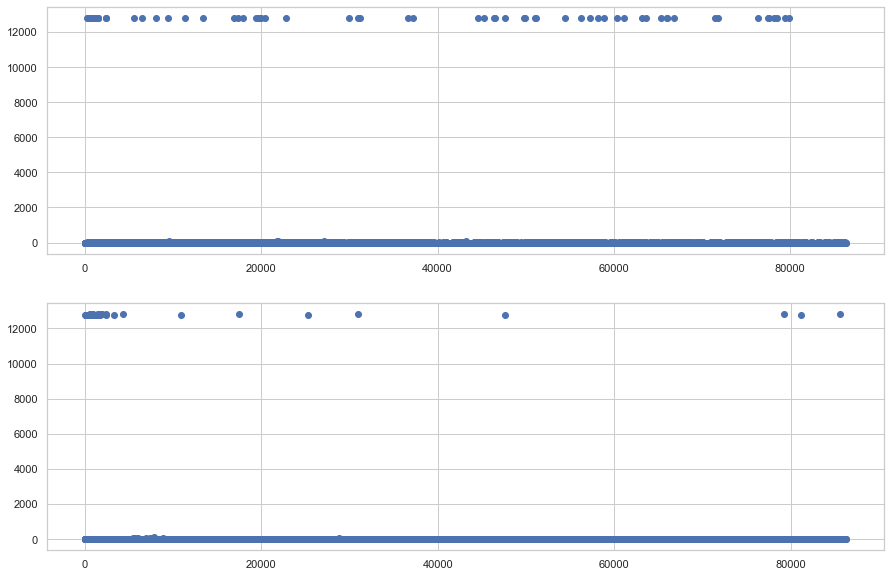

In [96]:
plt.figure(figsize =(15,10))

ax1 = plt.subplot(211)
ax1.scatter(customers.duration_sec,customers.Distance_in_Km)

ax2 = plt.subplot(212)
ax2.scatter(subscribers.duration_sec,subscribers.Distance_in_Km)

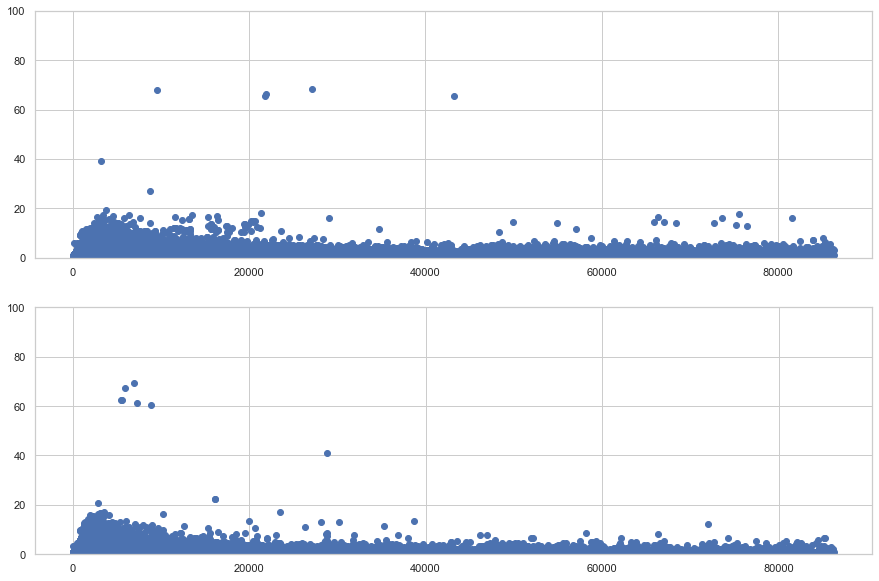

In [100]:
plt.figure(figsize =(15,10))

ax1 = plt.subplot(211)
ax1.scatter(customers.duration_sec,customers.Distance_in_Km)
ax1.set_ylim(0,100);
ax2 = plt.subplot(212)
ax2.scatter(subscribers.duration_sec,subscribers.Distance_in_Km)
ax2.set_ylim(0,100);

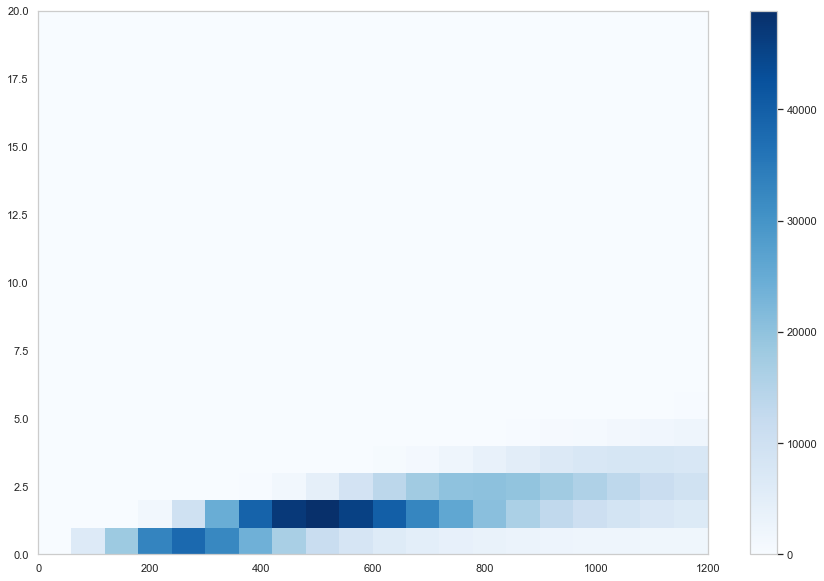

In [105]:
plt.figure(figsize =(15,10))


bins_x = np.arange(0,20*60+60,60)
bins_y = np.arange(0,20+1,1)

plt.hist2d(data=customers, x= "duration_sec",y="Distance_in_Km", bins = [bins_x, bins_y], cmap='Blues');
plt.colorbar()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> overall, the average ride duration for customers is higher than subscribers but at some periods of the day the diffrence becomes very large and at some other it becomes very small

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!